In [1]:
import MDAnalysis as mda
import math
import matplotlib.pyplot as plt

c:\Users\jeffs\Documents\Research_DrShen\MSD\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
graphite_water_psf = r'C:\Users\jeffs\Documents\Research_DrShen\MSD\msd_water_box\data_files\graphite_water.psf'
graphite_trajectory_dcd = r'C:\Users\jeffs\Documents\Research_DrShen\MSD\msd_water_box\data_files\output_per_40ps.dcd'


In [3]:
global_uni = mda.Universe(graphite_water_psf,graphite_trajectory_dcd)
global_uni.trajectory[0]


c:\Users\jeffs\Documents\Research_DrShen\MSD\.venv\Lib\site-packages\MDAnalysis\coordinates\DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


< Timestep 0 with unit cell dimensions [ 34.385025  51.048    160.        90.        90.        90.      ] >

In [4]:

SPCE_uni = global_uni.select_atoms('resname SPCE')
SPCE_positions = SPCE_uni.positions
print(SPCE_positions)

[[ 7.859997   8.19254   53.64271  ]
 [ 7.261132   8.981481  53.50511  ]
 [ 7.982774   8.034126  54.62242  ]
 ...
 [ 7.3078575 12.304783  43.505085 ]
 [ 7.2543225 11.851191  44.394688 ]
 [ 8.127207  11.99581   43.022175 ]]


In [5]:
global_uni.trajectory[1]
SPCE_positions = SPCE_uni.positions
print(SPCE_positions)

[[ 7.971569  13.266274  55.89519  ]
 [ 8.153792  13.556071  56.834774 ]
 [ 8.289162  13.97151   55.261333 ]
 ...
 [ 4.7483773  9.069457  41.672573 ]
 [ 5.350026   9.831912  41.910652 ]
 [ 4.845379   8.859542  40.69968  ]]


In [6]:
frame_positions = {} # {frame_n:[[x_0, y_0, z_0], ...] , ... ], ... }
for frame in range(len(global_uni.trajectory)):
    global_uni.trajectory[frame]
    frame_positions[frame] = SPCE_uni.positions

print(len(frame_positions.keys()))

501


In [7]:
z_maxs = []
for frame in frame_positions.keys():
    val_1 = []
    val_2 = []
    val_3 = []
    for atom in frame_positions[frame]:
        val_1.append(atom[0])
        val_2.append(atom[1])
        val_3.append(atom[2])
    z_maxs.append(max(val_3))



In [8]:
average_z_max = sum(z_maxs)/len(z_maxs)
partition_count = 4
z_partitions = []

for i in range(int(global_uni.dimensions[2] / 10)):
    z_ceiling = i * 10
    if average_z_max < z_ceiling:
        for i in range(partition_count):
            z_partitions.append(z_ceiling / 4 * (i + 1))
        break

In [9]:
for frame in range(len(global_uni.trajectory)):
    global_uni.trajectory[frame]
    initial_statement = global_uni.atoms[0]

    if initial_statement != global_uni.atoms[0]:
        print(frame, "Unsymmetric")

In [10]:
for frame in range(len(global_uni.trajectory)):
    global_uni.trajectory[frame]
    print(SPCE_uni.positions[0])

[ 7.859997  8.19254  53.64271 ]
[ 7.971569 13.266274 55.89519 ]
[-2.9277499  1.7112976 56.34165  ]
[-11.304557    -0.36781806  60.572605  ]
[14.911165 -2.271835 58.34613 ]
[10.349253  -0.3186192 52.85407  ]
[ 9.067688   1.6757503 43.66716  ]
[11.916775  9.123896 43.216873]
[ 9.175274  9.055238 44.000988]
[ 9.729563 13.123681 42.98035 ]
[12.985651 11.562179 54.271755]
[-16.752945  15.058746  57.519974]
[-16.774124  16.996843  59.886658]
[14.455725 21.077137 58.47777 ]
[ -0.11108019 -24.739557    57.48121   ]
[ -3.0867157 -23.326992   57.268936 ]
[-3.4604263 17.290365  60.19573  ]
[-2.633854 14.273362 55.044537]
[ 3.635416 17.38367  52.68486 ]
[12.225058 17.679453 54.437717]
[ 4.529091 17.40059  47.232384]
[ 0.74798584 13.226708   52.800507  ]
[ 2.089447 12.673891 59.917465]
[ 1.2781715 13.03256   54.584248 ]
[ 0.4043083 12.516782  52.092663 ]
[ 7.266342 13.193274 54.18949 ]
[ 5.9347286 17.522564  47.80669  ]
[ 8.852186 19.101772 42.096085]
[ 5.7750206 16.670965  39.98607  ]
[14.602148 2

In [11]:
for atom in SPCE_uni.atoms:
    print(atom)
global_uni.trajectory[0]
print(SPCE_uni.atoms[4033])
global_uni.trajectory[1]
print(SPCE_uni.atoms[4033])

<Atom 4033: OW of type OTW of resname SPCE, resid 1 and segid 1>
<Atom 4034: HW1 of type HTW of resname SPCE, resid 1 and segid 1>
<Atom 4035: HW2 of type HTW of resname SPCE, resid 1 and segid 1>
<Atom 4036: OW of type OTW of resname SPCE, resid 2 and segid 1>
<Atom 4037: HW1 of type HTW of resname SPCE, resid 2 and segid 1>
<Atom 4038: HW2 of type HTW of resname SPCE, resid 2 and segid 1>
<Atom 4039: OW of type OTW of resname SPCE, resid 3 and segid 1>
<Atom 4040: HW1 of type HTW of resname SPCE, resid 3 and segid 1>
<Atom 4041: HW2 of type HTW of resname SPCE, resid 3 and segid 1>
<Atom 4042: OW of type OTW of resname SPCE, resid 4 and segid 1>
<Atom 4043: HW1 of type HTW of resname SPCE, resid 4 and segid 1>
<Atom 4044: HW2 of type HTW of resname SPCE, resid 4 and segid 1>
<Atom 4045: OW of type OTW of resname SPCE, resid 5 and segid 1>
<Atom 4046: HW1 of type HTW of resname SPCE, resid 5 and segid 1>
<Atom 4047: HW2 of type HTW of resname SPCE, resid 5 and segid 1>
<Atom 4048: OW 

In [12]:
print(global_uni.atoms[0])
graphite_uni = global_uni.select_atoms('resname GRA')
for i in range(len(global_uni.trajectory)):
    global_uni.trajectory[i]
    print(graphite_uni.positions[0])

<Atom 1: C of type CA of resname GRA, resid 1 and segid 2>
[-17.192316 -25.523804 -17.399265]
[-17.212343 -25.62455  -16.995878]
[-17.194323 -25.441088 -17.065699]
[-17.056002 -25.571285 -17.0352  ]
[-17.204117 -25.445562 -17.108435]
[-17.027563 -25.313517 -16.710764]
[-17.315197 -25.534866 -16.921858]
[-17.251377 -25.7861   -16.74466 ]
[-17.008656 -25.603783 -16.737816]
[-17.22454  -25.281866 -17.147152]
[-17.19673 -25.55152 -16.90221]
[-17.068213 -25.453262 -16.937326]
[-16.842081 -25.74757  -16.714945]
[-17.378952 -25.800999 -16.613277]
[-17.254786 -25.743427 -17.211622]
[-17.39209 -25.46916 -16.96845]
[-17.337233 -25.622404 -16.72801 ]
[-17.21114  -25.471048 -16.686104]
[-17.286978 -25.72884  -17.1252  ]
[-16.984701 -25.348671 -17.271847]
[-16.993916 -25.343231 -17.005796]
[-17.135975 -25.666811 -16.761934]
[-17.108168 -25.445581 -16.931824]
[-16.969988 -25.422468 -16.85738 ]
[-17.395716 -25.832058 -16.692135]
[-17.123774 -25.525356 -16.962818]
[-17.031277 -25.520393 -16.66278 ]
[-

In [13]:

atom_1_pos = {'x_vals':[],'y_vals':[],'z_vals':[]}
for frame in range(len(global_uni.trajectory)):
    global_uni.trajectory[frame]
    SPCE_positions = SPCE_uni.positions
    atom_1_pos['x_vals'].append(SPCE_positions[0][0]) # SPCE_uni[atom_number][x or y or z]
    atom_1_pos['y_vals'].append(SPCE_positions[0][1])
    atom_1_pos['z_vals'].append(SPCE_positions[0][2])


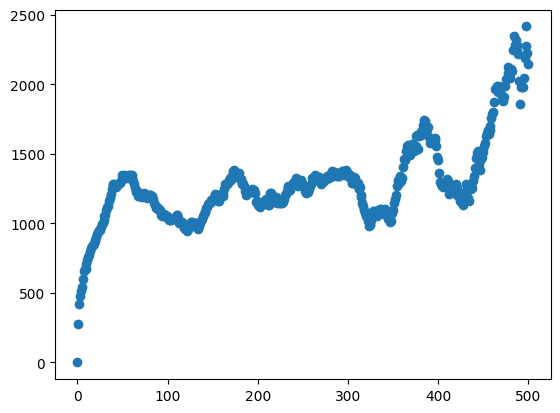

In [14]:
import numpy as np

# Example dictionary with position values
# Replace with your actual data

# Function to calculate MSD
def calculate_msd(position_dict):
    x_vals = np.array(position_dict['x_vals'])
    y_vals = np.array(position_dict['y_vals'])
    z_vals = np.array(position_dict['z_vals'])
    
    # Number of time points
    num_points = len(x_vals)
    
    # Initialize MSD array
    msd = np.zeros(num_points)
    
    # Calculate displacements and MSD
    for dt in range(1, num_points):
        displacements = []
        for t in range(num_points - dt):
            dx = x_vals[t + dt] - x_vals[t]
            dy = y_vals[t + dt] - y_vals[t]
            dz = z_vals[t + dt] - z_vals[t]
            displacement_squared = dx**2 + dy**2 + dz**2
            displacements.append(displacement_squared)
        
        msd[dt] = np.mean(displacements)
    
    return msd

# Calculate MSD for the given position data
msd_values = calculate_msd(atom_1_pos)


# Print the MSD values
#for i, msd in enumerate(msd_values):
#    print(f"MSD at time interval {i}: {msd}")

plt.scatter(range(len(msd_values)),msd_values)

In [15]:
#0.0-17.5  = 0
#17.5-35.0 = 1
#35.0-52.5 = 2
#52.5-70.0 = 3 
atom_1_part_movement = []
atom_1_part = {}
ticker = -1

for i in range(len(atom_1_pos['z_vals'])): # Looping through each position point for atom 1 throughout the trajectory

    if atom_1_pos['z_vals'][i] < z_partitions[0]:
        current_part = 0
    elif atom_1_pos['z_vals'][i] < z_partitions[1]:
        current_part = 1
    elif atom_1_pos['z_vals'][i] < z_partitions[2]:
        current_part = 2 
    elif atom_1_pos['z_vals'][i] < z_partitions[3]:
        current_part = 3
    # Asking what partition does the atom currently fall in
    
    if len(atom_1_part_movement) == 0 or atom_1_part_movement[-1] != current_part:
        ticker += 1
        atom_1_part[ticker] = {}
        atom_1_part[ticker]['x_vals'] = []
        atom_1_part[ticker]['y_vals'] = []
        atom_1_part[ticker]['z_vals'] = []
    # Asking, are we NOT in the same partition as 1 frame ago
    # If  we are not in same partition, create data structure for atoms in new partition to be appended to
    # (Also just creates stucture if we werent in a partition last frame [ie just started])

    atom_1_part[ticker]['x_vals'].append(atom_1_pos['x_vals'][i])
    atom_1_part[ticker]['y_vals'].append(atom_1_pos['y_vals'][i])
    atom_1_part[ticker]['z_vals'].append(atom_1_pos['z_vals'][i])
    atom_1_part_movement.append(current_part)
    # With the correct structure in place, we append our x,y,z values to the correct location and append our current_part location


In [16]:
print(atom_1_part)

{0: {'x_vals': [7.859997, 7.971569, -2.9277499, -11.304557, 14.911165, 10.349253], 'y_vals': [8.19254, 13.266274, 1.7112976, -0.36781806, -2.271835, -0.3186192], 'z_vals': [53.64271, 55.89519, 56.34165, 60.572605, 58.34613, 52.85407]}, 1: {'x_vals': [9.067688, 11.916775, 9.175274, 9.729563], 'y_vals': [1.6757503, 9.123896, 9.055238, 13.123681], 'z_vals': [43.66716, 43.216873, 44.000988, 42.98035]}, 2: {'x_vals': [12.985651, -16.752945, -16.774124, 14.455725, -0.11108019, -3.0867157, -3.4604263, -2.633854, 3.635416, 12.225058], 'y_vals': [11.562179, 15.058746, 16.996843, 21.077137, -24.739557, -23.326992, 17.290365, 14.273362, 17.38367, 17.679453], 'z_vals': [54.271755, 57.519974, 59.886658, 58.47777, 57.48121, 57.268936, 60.19573, 55.044537, 52.68486, 54.437717]}, 3: {'x_vals': [4.529091], 'y_vals': [17.40059], 'z_vals': [47.232384]}, 4: {'x_vals': [0.74798584, 2.089447, 1.2781715], 'y_vals': [13.226708, 12.673891, 13.03256], 'z_vals': [52.800507, 59.917465, 54.584248]}, 5: {'x_vals': 

In [17]:
msd_dict = {}

for key in atom_1_part.keys():
    msd_dict[key] = calculate_msd(atom_1_part[key])


In [18]:
print(len(msd_dict.keys()))
print(msd_dict)

116
{0: array([  0.        , 225.2741614 , 402.89445255, 325.58127427,
       190.39770391,  79.25817911]), 1: array([  0.        ,  29.94382275,  37.70898726, 131.96491637]), 2: array([   0.        ,  673.33209802, 1225.96155024, 1095.2774482 ,
       1237.15093902,  805.85881603,  261.46985318,  522.49831646,
        489.96396996,   38.02709047]), 3: array([0.]), 4: array([ 0.        , 40.99312342,  3.50052229]), 5: array([0.]), 6: array([0.]), 7: array([  0.        , 177.69193153, 218.31094669, 347.3707771 ,
       318.41037662, 265.60168139, 218.7815086 ]), 8: array([  0.        ,  85.67602131, 129.58960429, 158.87935214]), 9: array([  0.        ,  88.17180371, 152.10125301, 225.5968041 ,
       331.05630887, 407.8065485 , 604.71371383]), 10: array([   0.        , 1770.56921935,  811.31944109, 1379.40775764,
       2468.88297723]), 11: array([0.]), 12: array([   0.        ,   53.38836938,  114.71355997,  194.83979186,
        312.82084577,  368.55271487,  441.29590775,  534.3481773